导入库

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
from compareFragments import compareFragments
from audio2vec import * # 导入原始信号和判决信号

# 2-order Method

## 导数建立

In [13]:
diff_arr = np.diff(result_array)
diff_arr_pad = np.zeros(len(diff_arr)+1)
diff_arr_pad[1:] = diff_arr
first_index = np.where(diff_arr_pad!=0)[0][0]
intial_value = 2*value/(first_index+1)

### 导数递归

In [14]:
def derivation(intial_value, sign_arr):
    derivation = np.zeros(len(sign_arr))
    loc_arr = np.abs(sign_arr)*np.arange(0, len(sign_arr))
    loc_arr = np.array(loc_arr,dtype=int)
    loc_arr = loc_arr[np.where(loc_arr != 0)]# delte zetos
    print(loc_arr)

    # Intial the first derivation
    derivation[loc_arr[0]] = intial_value

    # a and b
    for i in range(1,len(loc_arr)):
        N = loc_arr[i] - loc_arr[i-1]
        derivation[loc_arr[i]] = (1-N)/(1+N)*derivation[loc_arr[i-1]]
    
    # Connection
    fa = 0
    fb = derivation[loc_arr[0]]
    a = 0
    b = loc_arr[0]
    j = 0
    for i in range(len(derivation)):
        # print(i)
        if i == loc_arr[-1]:
            break
        if i in loc_arr:
            a = loc_arr[j]
            b = loc_arr[j+1]
            fa = derivation[a]
            fb = derivation[b]
            j += 1
        else:
            slope = (fb-fa)/(b-a)
            derivation[i] = slope*(i-a)+fa

    return derivation

test_arr = [0,0,1,0,0,-1,0,0,0,1]
print(derivation(5,test_arr))


[2 5 9]
[ 0.   2.5  5.   2.5  0.  -2.5 -1.5 -0.5  0.5  1.5]


## Signal Recovery

[ 23746  23748  24256 ... 440992 440993 440994]


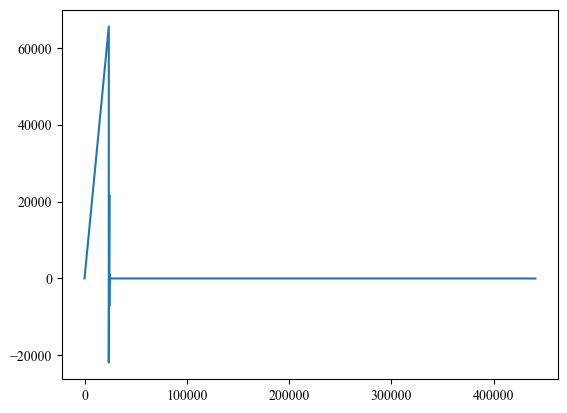

In [15]:
loc_arr = np.abs(diff_arr_pad)*np.arange(0, len(diff_arr_pad))
loc_arr = np.array(loc_arr,dtype=int)
loc_arr = loc_arr[np.where(loc_arr != 0)]# delte zetos
diff_loc = np.diff(loc_arr)

SR = 65536/np.min(diff_loc)

der = derivation(SR,diff_arr_pad)
plt.plot(der)

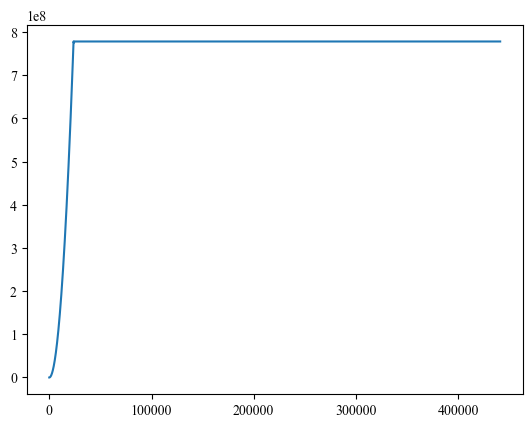

In [16]:
rebuild_2 = np.cumsum(der)
plt.plot(rebuild_2)
fft_rebuild_2 = np.fft.fft(rebuild_2)

截取信号对比

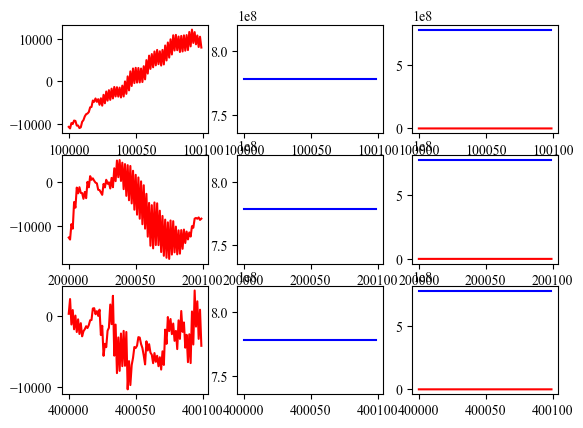

In [17]:
start = [100000,200000,400000]
compareFragments(sample_cut,rebuild_2,start,100)

# 恢复度分析

In [18]:
loss_threshold = np.mean((np.abs(fft_threshold)-np.abs(fft_original))**2)
print(f"Threshold loss is \t{loss_threshold:.2e}")

loss_rebuild_2 = np.mean((np.abs(fft_rebuild_2)-np.abs(fft_original))**2)
rebuild_rate = (loss_threshold-loss_rebuild_2)/loss_threshold
print(f"Rebuild(2-ord) loss is \t{loss_rebuild_2:.2e}, \trebuild rate is \t{rebuild_rate:.2%}")

Threshold loss is 	2.36e+13
Rebuild(2-ord) loss is 	2.56e+23, 	rebuild rate is 	-1081309894693.59%
